In [15]:
import cv2
import matplotlib.pyplot as plt
import pywt
import numpy as np
from stego.core.utils import dwt_rgb_forward
from stego.core.message import bytes_to_binary, binary_to_bytes
from scipts.detail_comparison import compress_and_compare
from skimage.metrics import peak_signal_noise_ratio, mean_squared_error
import base64

IMG_PATH = "C:/Users/Daniel/Pictures/SAMPLING/8BIT/RGB/2448x2448/SRC/img_2448x2448_3x8bit_SRC_RGB_billiard_balls_b.png"

In [16]:
def show_image(img):
    plt.imshow(img)
    plt.show()
    
def compress_image(img, quality=90):
    encode_param = [cv2.IMWRITE_JPEG_QUALITY, quality]
    _, encoded_data = cv2.imencode('.jpg', img, encode_param)
    return cv2.imdecode(encoded_data, cv2.IMREAD_COLOR)

In [17]:
original_image = cv2.cvtColor(cv2.imread(IMG_PATH, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)

In [18]:
encoded_image = compress_image(original_image, 90)


In [19]:

params = dict(level=4, wavelet='haar')
channels = cv2.split(original_image)

original_image_rgb_dwt = dwt_rgb_forward(original_image, **params)

In [20]:
bits = bytes_to_binary(b'Hello World')

In [21]:
binary_to_bytes(bits)

b'Hello World'

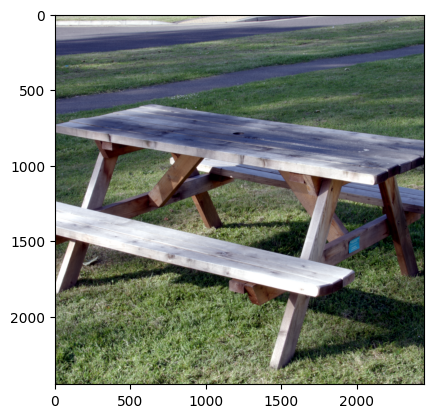

In [29]:


# Given data as a dictionary

img_dir_path = "C:/Users/Daniel/Pictures/SAMPLING/8BIT/RGB/2448x2448/SRC/"
file_name = "img_2448x2448_3x8bit_SRC_RGB_garden_table.png"
img_path = img_dir_path + file_name



plt.imshow(cv2.cvtColor(cv2.imread(img_path, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB))

def metric(original, compressed):
    data_range = original.max() - original.min()
    return {
        "psnr":peak_signal_noise_ratio(original, compressed, data_range=data_range),
        "mse": mean_squared_error(original, compressed),
        "var": np.var(original - compressed)
    }


# qualities=list(range(40, 100, 20)) , max_level=5, wavelet='haar', metric=mean_diff
settings = {
    "qualities": range(50, 100, 15),
    "max_level": 4,
    "wavelet": 'haar',
    "metric": metric
}

data = compress_and_compare(img_path, **settings)


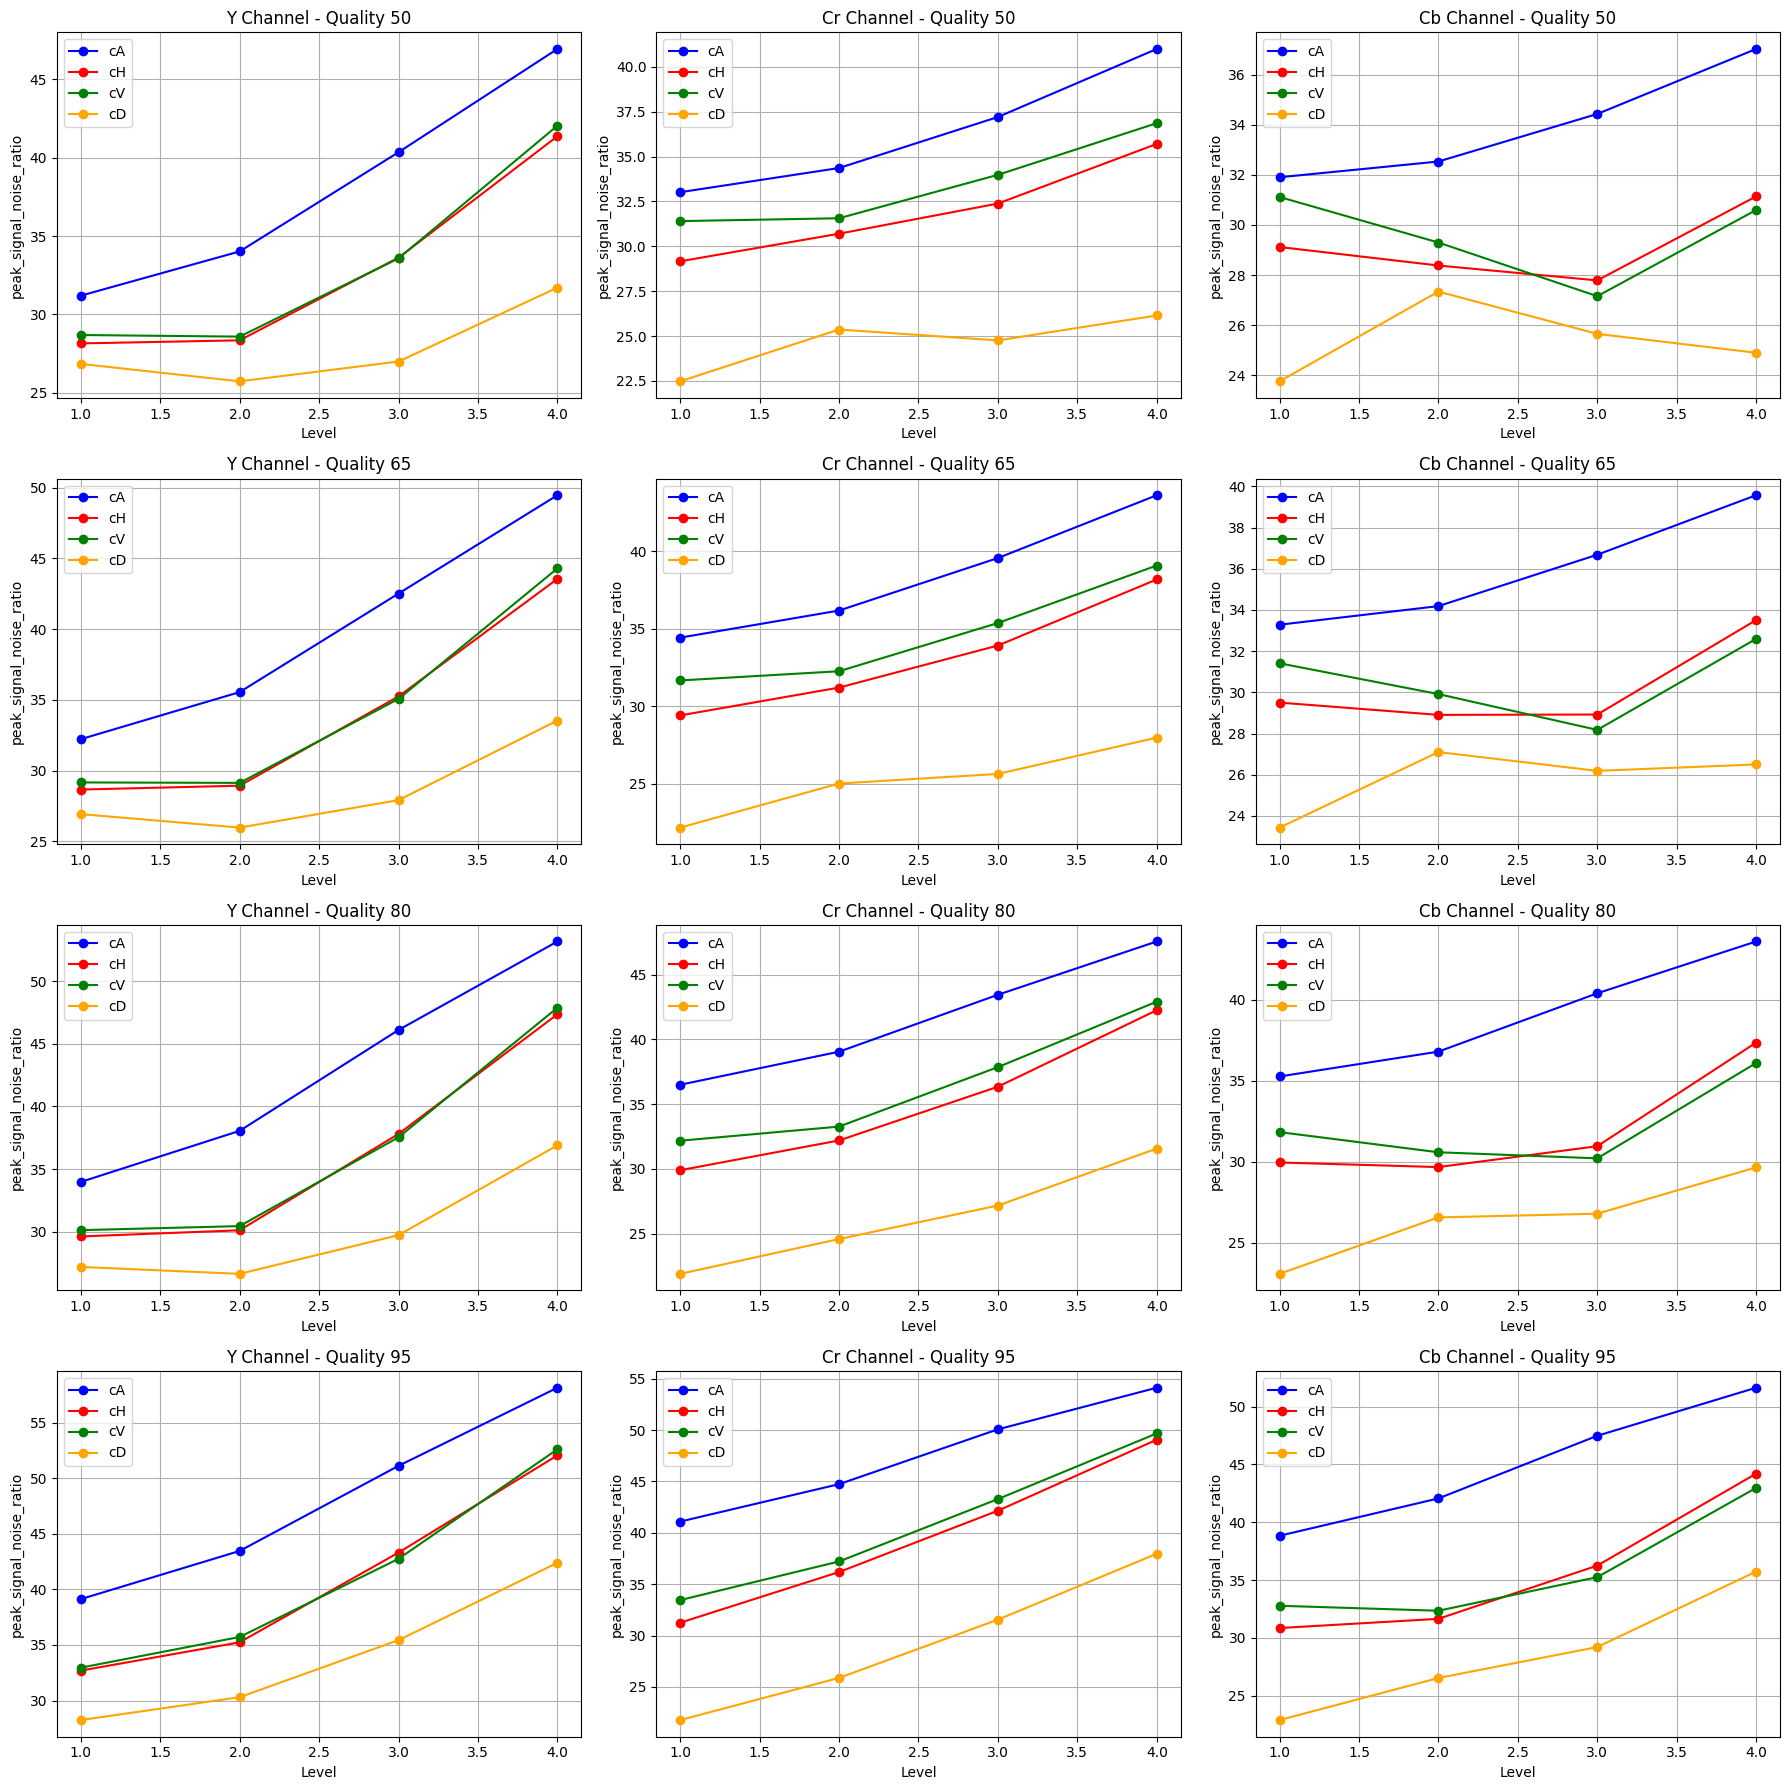

In [33]:

quality_levels = data.keys()
levels = range(1, settings["max_level"]+1)

# Create a grid of plots
fig, axes = plt.subplots(nrows=len(quality_levels), ncols=3, figsize=(18, 18))

# Plot data for each channel
for i, quality in enumerate(quality_levels):
    channels = data[quality].keys()
    for j, channel in enumerate(channels):
        ax = axes[i, j]
        
        # Extract and plot data for each coefficient
        for coef, color in zip(['cA', 'cH', 'cV', 'cD'], ['blue', 'red', 'green', 'orange']):
            mean_diffs = [data[quality][channel][f"l{level}"][coef]["psnr"] for level in levels]
            ax.plot(levels, mean_diffs, marker='o', label=coef, color=color)
        
        ax.set_title(f"{channel} Channel - Quality {quality}")
        ax.set_xlabel("Level")
        ax.set_ylabel("peak_signal_noise_ratio")
        ax.legend()
        ax.grid(True)
plt.tight_layout()
plt.show()